In [2]:
import pandas as pd
import numpy as np

data_June20_raw=pd.read_csv("./Dataset_Potato_18_20/June2020.csv").drop(columns=['Unnamed: 0'])
data_Aug20_raw=pd.read_csv("./Dataset_Potato_18_20/August2020.csv").drop(columns=['Unnamed: 0'])
isotope_data_20=pd.read_csv('./Dataset_Potato_18_20/Isotope2020.csv').drop(columns=['Unnamed: 0'])


In [3]:
data_June20_raw

,tube,ID,x,Ntret,camera,root_length_cm,depth,soil_depth,month
0,353,Aventra,3100,high,Cam3,0.00,610,38.17,june
1,353,Aventra,3100,high,Cam3,0.53,640,38.99,june
2,353,Aventra,3100,high,Cam3,0.00,680,40.08,june
3,353,Aventra,3100,high,Cam3,0.00,720,41.17,june
4,353,Aventra,3100,high,Cam3,1.57,750,41.99,june
...,...,...,...,...,...,...,...,...,...
5111,448,Argana,3195,low,Cam3,0.80,2350,85.55,june
5112,448,Argana,3195,low,Cam3,0.00,2380,86.37,june
5113,448,Argana,3195,low,Cam3,0.00,2420,87.46,june
5114,448,Argana,3195,low,Cam3,0.90,2450,88.27,june


In [4]:
# Importing RadiMax modules for RL data preprocessing
from  RadiMaxDataPreProcessing import RL_processing, fun_RL_computation, plot_RL,isotope_data_preprocess

# Processing 2018 RL data for getting root lengths from pixels values  
data_June20,data_June20,data_Aug20=RL_processing(data_June20_raw.copy(),data_June20_raw.copy(),data_Aug20_raw.copy(),Square_root=True)


In [5]:
n=25
#Number of intervals for computation of RL 2018
Soil_depth_range_20=np.floor(np.linspace(start =np.min([data_Aug20['soil_depth'].min(),data_June20['soil_depth'].min(),data_June20['soil_depth'].min()]) , stop = np.max([data_Aug20['soil_depth'].max(),data_June20['soil_depth'].max(),data_June20['soil_depth'].max()])+106, num = n+1))
Soil_depth_range_20

array([ 38.,  46.,  55.,  63.,  72.,  80.,  89.,  97., 106., 114., 123.,
       131., 140., 148., 157., 165., 174., 182., 191., 199., 208., 216.,
       225., 233., 242., 250.])

In [6]:
#Computation Root Lengths in Different Soil Layers in  2018
RL_Aug20,_=fun_RL_computation(data_Aug20.copy(),'RL_Aug_SD_',n,Soil_depth_range_20.astype(int))
RL_June20,_=fun_RL_computation(data_June20.copy(),'RL_June_SD_',n,Soil_depth_range_20.astype(int))
RL_June20,Intervals=fun_RL_computation(data_June20.copy(),'RL_June_SD_',n,Soil_depth_range_20.astype(int))

In [7]:
RL_June20.fillna(0,inplace=True)
RL_June20.head(5)

,"RL_June_SD_(38, 46]","RL_June_SD_(46, 55]","RL_June_SD_(55, 63]","RL_June_SD_(63, 72]","RL_June_SD_(72, 80]","RL_June_SD_(80, 89]","RL_June_SD_(89, 97]","RL_June_SD_(97, 106]","RL_June_SD_(106, 114]","RL_June_SD_(114, 123]",...,"RL_June_SD_(174, 182]","RL_June_SD_(182, 191]","RL_June_SD_(191, 199]","RL_June_SD_(199, 208]","RL_June_SD_(208, 216]","RL_June_SD_(216, 225]","RL_June_SD_(225, 233]","RL_June_SD_(233, 242]","RL_June_SD_(242, 250]",row
0,0.712196,0.557762,0.270261,0.423461,0.037500,0.159914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0
1,0.448200,0.689474,0.206851,0.198139,0.119352,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,354.0
2,0.630583,0.471179,0.059835,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355.0
3,1.425890,0.848606,0.746268,0.196819,0.708036,0.509111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0
4,1.458450,0.613333,0.069597,0.345994,0.117804,0.176267,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357.0


In [8]:
RL_Aug20.fillna(0,inplace=True)
RL_Aug20.head(5)

,"RL_Aug_SD_(38, 46]","RL_Aug_SD_(46, 55]","RL_Aug_SD_(55, 63]","RL_Aug_SD_(63, 72]","RL_Aug_SD_(72, 80]","RL_Aug_SD_(80, 89]","RL_Aug_SD_(89, 97]","RL_Aug_SD_(97, 106]","RL_Aug_SD_(106, 114]","RL_Aug_SD_(114, 123]",...,"RL_Aug_SD_(174, 182]","RL_Aug_SD_(182, 191]","RL_Aug_SD_(191, 199]","RL_Aug_SD_(199, 208]","RL_Aug_SD_(208, 216]","RL_Aug_SD_(216, 225]","RL_Aug_SD_(225, 233]","RL_Aug_SD_(233, 242]","RL_Aug_SD_(242, 250]",row
0,0.386123,0.438742,0.206199,0.602130,0.185740,0.814621,0.654383,0.150633,0.376346,0.011111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0
1,0.212533,0.468346,0.623055,0.774138,0.179849,0.178125,0.158768,0.188192,0.323755,0.138533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,354.0
2,0.087384,0.770993,0.000000,0.157648,0.371181,0.202412,0.066249,0.135995,0.356776,0.201073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355.0
3,0.406217,0.524552,0.453849,0.471584,0.454547,0.385165,0.378171,0.331604,0.271308,0.240732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0
4,0.655920,0.846059,0.466582,1.118832,1.016576,0.310798,1.228650,0.563725,0.069597,0.086081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357.0


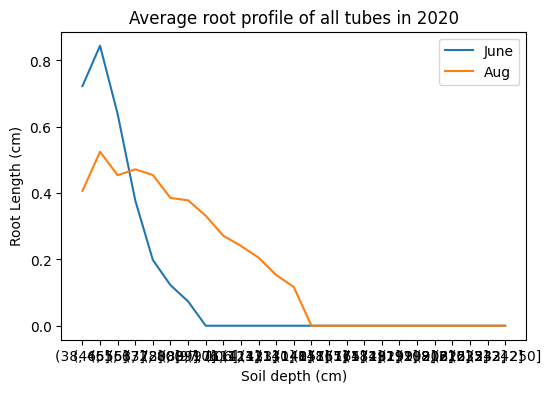

In [9]:
plot_RL(RL_June20,RL_June20,RL_Aug20,Intervals,n,2020)

In [10]:
RL_Interval_20=RL_June20.merge(RL_Aug20,on='row')

In [11]:
F_RL_Interval_20=RL_Interval_20.append(RL_Interval_20[RL_Interval_20["row"].eq(365)]).sort_values("row").reset_index(drop=True)

/tmp/ipykernel_1374/3583121184.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_RL_Interval_20=RL_Interval_20.append(RL_Interval_20[RL_Interval_20["row"].eq(365)]).sort_values("row").reset_index(drop=True)


In [12]:
F_RL_Interval_20.head(5)

,"RL_June_SD_(38, 46]","RL_June_SD_(46, 55]","RL_June_SD_(55, 63]","RL_June_SD_(63, 72]","RL_June_SD_(72, 80]","RL_June_SD_(80, 89]","RL_June_SD_(89, 97]","RL_June_SD_(97, 106]","RL_June_SD_(106, 114]","RL_June_SD_(114, 123]",...,"RL_Aug_SD_(165, 174]","RL_Aug_SD_(174, 182]","RL_Aug_SD_(182, 191]","RL_Aug_SD_(191, 199]","RL_Aug_SD_(199, 208]","RL_Aug_SD_(208, 216]","RL_Aug_SD_(216, 225]","RL_Aug_SD_(225, 233]","RL_Aug_SD_(233, 242]","RL_Aug_SD_(242, 250]"
0,0.712196,0.557762,0.270261,0.423461,0.037500,0.159914,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.448200,0.689474,0.206851,0.198139,0.119352,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.630583,0.471179,0.059835,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.425890,0.848606,0.746268,0.196819,0.708036,0.509111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.458450,0.613333,0.069597,0.345994,0.117804,0.176267,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
F_RL_Interval_20.reset_index(drop=True,inplace=True)

In [14]:
F_RL_Interval_20.iloc[0,:].values[n+1:] 

array([0.38612268, 0.43874246, 0.2061986 , 0.60212988, 0.18573954,
       0.81462095, 0.65438283, 0.15063316, 0.37634649, 0.01111111,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [15]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 3.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import os
from PyPDF2 import PdfFileMerger
merger = PdfFileMerger()

   
def sigmoid(x, x0,b,L,c):
    return L*(scipy.special.expit((x-x0)*b,dtype = np.float128))+c  #expit(x) = 1/(1+exp(-b*(x-x0))).
def func_exp_sq(t, a, tau):
    return a*np.exp(-t*t*tau,dtype = np.float128)

def sigmoid_initial_Infle_point(x,y):
    xi=0
    xp=0
    x0_sig_inflec_p=0.1
    ipoints=[.35,0.45,.65,.75,.9]
    i=0
    for x0 in ipoints:
        print(x0)
        args, cov =curve_fit(sigmoid, x, y,p0=[x0,5,2,.01],maxfev=10000000,ftol=1e-08, xtol=1e-08,gtol=.0001)       
        x0_sig_inflec_c,b_sig,L,c=args
        print(f'x0_sig_inflec_c{x0_sig_inflec_c}')
        if x0_sig_inflec_c>1 or  x0_sig_inflec_c<0:
          
            if x0_sig_inflec_c<0:
                continue
            else:
                
                if (i==len(ipoints)-1):
                    xi=xp
                    break
                else: 
                    continue
                
        if x0_sig_inflec_c > x0_sig_inflec_p:

            xi=x0
            x0_sig_inflec_p=x0_sig_inflec_c
            
        xp=x0
        i=i+1
    
     
    return xi   



inflection=np.array([])
tube=np.array([]) 
TRL_below_SI=np.array([])
TRL_above_SI=np.array([])
TRL=np.array([])



SI=pd.DataFrame()




for i in range(0,F_RL_Interval_20.index[-1],2):# Alternating index
#for i in range(0,12,2):
    x=np.zeros((1,n)).flatten()
    j=0
    for k in Intervals:
     x[j]=(Intervals[j].left+Intervals[j].right)/2
     j=j+1
   
    y_aug_1=F_RL_Interval_20.iloc[i,:].values[n+1:] # y_Aug 1st tube
    y_aug_2=F_RL_Interval_20.iloc[i+1,:].values[n+1:]# y_Aug 2nd tube

    y_avg=(y_aug_1+y_aug_2)/2
    
    tube_no=F_RL_Interval_20.iloc[i,:]['row']
    
    
    
    data=pd.DataFrame({'soil_depth':x,'root_length_t1':y_aug_1,'root_length_t2':y_aug_2})
    
    x1=data['soil_depth']
    y1=data['root_length_t1']
    x2=data['soil_depth']
    y2=data['root_length_t2']

    x=pd.concat([x1, x2])
    y=pd.concat([y1,y2])
    #df=pd.DataFrame({'soil_depth':x,'root_length_cm':y})

    df=pd.DataFrame({'soil_depth':x1,'root_length_cm':y_avg})
    temp1=df.sort_values(by='soil_depth').reset_index(drop=True)
    
    x=temp1['soil_depth']
    y=temp1['root_length_cm']
    

    x = (x- x.values[0])/(x.values[-1] - x.values[0])   # normalize    
    print(f'Tube No: {tube_no}')

    

    xp_lav=round(x*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)   
    
    #xi=sigmoid_initial_Infle_point(x,y) 
    
    args, cov =curve_fit(sigmoid, x, y,p0=[0.55,5,2,.01],maxfev=1000000,ftol=1e-08, xtol=1e-08,gtol=.00001) 
    x0_sig_inflec,b_sig,L,c=args  
    
    y_pred = sigmoid(x, *args)
    SR2=r2_score(y, y_pred)
    x0_sig_inflec_actual=round(x0_sig_inflec*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)
    s=str(x0_sig_inflec_actual)+" cm"
    if x0_sig_inflec_actual>0:
        tube=np.append(tube,tube_no)
        inflection=np.append(inflection,x0_sig_inflec_actual)
        
        ip=np.where(xp_lav>=x0_sig_inflec_actual)[-1][0]
        print(ip)
        RL=y.values[0:].sum()# all
        RL1=y.values[ip:].sum()# below
        RL2=y.values[0:ip].sum()#above
        TRL=np.append(TRL,RL)
        TRL_below_SI=np.append(TRL_below_SI,RL1)
        TRL_above_SI=np.append(TRL_above_SI,RL2)
    
    '''fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(xp_lav, y, 'o', xp_lav, sigmoid(x, *args),'-')
    ax.set_prop_cycle(color=['green', 'blue'])

    ax.annotate('Inflection:'+s, xy=(x0_sig_inflec_actual, sigmoid(x0_sig_inflec,x0_sig_inflec,b_sig,L,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='orange')
    plt.title('August 2020 : row no. '+ str(tube_no.astype(int)))
    ax.legend(['Root length data',r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2))])

    ax.set_xlabel('Soil depth (cm)')
    ax.set_ylabel(r'Root length(cm)') '''
    
    '''if x0_sig_inflec>0:
        y_pred = sigmoid(x, *args)
        SR2=r2_score(y, y_pred)
        x0_sig_inflec_actual=round(x0_sig_inflec*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)
        s=str(x0_sig_inflec_actual)+" cm"
        inflection=np.append(inflection,x0_sig_inflec_actual)
        ax.plot(xp_lav, y, 'o', xp_lav, sigmoid(x, *args),'-')
        ax.set_prop_cycle(color=['green', 'blue'])

        ax.annotate('Inflection:'+s, xy=(x0_sig_inflec_actual, sigmoid(x0_sig_inflec,x0_sig_inflec,b_sig,L,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                     arrowprops=dict(facecolor='black', shrink=0.05))

        ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='orange')
        plt.title('August 2020 : row no. '+ str(tube_no.astype(int)))
        ax.legend(['Root length data',r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2))])

        ax.set_xlabel('Soil depth (cm)')
        ax.set_ylabel(r'Root length(cm)')
    else:
        popt, pcov = curve_fit(func_exp_sq, x, y)
        a, tau= popt
        y_pred = func_exp_sq(x, a, tau)
        SR2=r2_score(y, y_pred)
      
        #Inflection point of Folded Normal Curve
        
        xp=1.0/(np.sqrt(2*tau)) 
            
        #Actual position of inflection point
        xp_actual=round(xp*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)
        inflection=np.append(inflection,xp_actual)  
        s=str(xp_actual)+" cm"
        ax.plot(xp_lav, y, 'o', xp_lav, sigmoid(x, *args),'-')
        ax.set_prop_cycle(color=['green', 'blue'])
        
        ax.annotate('Inflection:'+s, xy=(xp_actual, func_exp_sq(xp,a,tau)), xytext=(xp_actual+4, int(y.max()+1)/2-.2),arrowprops=dict(facecolor='black', shrink=0.05))

        ax.vlines(x=xp_actual, ymin=-0.1, ymax=int(y.max()+1),color='orange')
        plt.title('August 2020 : row no. '+ str(tube_no.astype(int)))
        ax.legend(['Root length data',r'Folded normal distribution : $R^{2}=$'+str(np.round(SR2,2))])
        ax.set_xlabel('Soil depth (cm)')
        ax.set_ylabel(r'Root length(cm)')'''
   
    #plt.savefig("page_{:0}.pdf".format(i))
    #plt.clf()
    #outp=open("page_{:0}.pdf".format(i), 'rb')
    #merger.append(outp)
    #merger.append(open("page_{:0}.pdf".format(i), 'rb'))
    #outp.close()
    #plt.close()
  
    #plt.show()
     # Save each figure as a pdf file.


         
    

SI=pd.concat([SI,pd.DataFrame({'row':tube}),pd.DataFrame({'SI':inflection}),pd.DataFrame({'RL_below_SI': TRL_below_SI}),pd.DataFrame({'RL_above_SI': TRL_above_SI}),pd.DataFrame({'TRL': TRL})],axis=1)


Tube No: 353.0
9
Tube No: 355.0
10
Tube No: 357.0
8
Tube No: 359.0
11
Tube No: 361.0
9
Tube No: 363.0
7
Tube No: 365.0


/opt/conda/envs/python3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Tube No: 367.0
11
Tube No: 369.0
10
Tube No: 371.0
11
Tube No: 373.0
Tube No: 375.0
7
Tube No: 377.0
10
Tube No: 379.0
5
Tube No: 381.0
11
Tube No: 383.0
9
Tube No: 385.0
10
Tube No: 387.0
8
Tube No: 389.0
10
Tube No: 391.0
12
Tube No: 393.0
6
Tube No: 395.0
8
Tube No: 397.0
10
Tube No: 399.0
8
Tube No: 401.0
12
Tube No: 403.0
9
Tube No: 405.0
8
Tube No: 407.0
9
Tube No: 409.0
8
Tube No: 411.0
8
Tube No: 413.0
9
Tube No: 415.0
10
Tube No: 417.0
11
Tube No: 419.0
9
Tube No: 421.0
10
Tube No: 423.0
11
Tube No: 425.0
8
Tube No: 427.0
10
Tube No: 429.0
Tube No: 431.0
10
Tube No: 433.0
9
Tube No: 435.0
Tube No: 437.0
8
Tube No: 439.0
11
Tube No: 441.0
13
Tube No: 443.0
10
Tube No: 445.0
11
Tube No: 447.0
6


In [18]:
SI

,row,SI,RL_below_SI,RL_above_SI,TRL
0,353.0,111.63,0.274101,3.460838,3.734940
1,355.0,120.27,0.329639,3.133720,3.463358
2,357.0,106.71,0.454298,4.569893,5.024191
3,359.0,130.07,0.449340,4.042820,4.492160
4,361.0,115.84,0.898502,6.388214,7.286716
5,363.0,93.39,0.418746,1.693255,2.112001
6,367.0,130.46,0.198934,4.171877,4.370811
7,369.0,126.49,0.452862,4.550690,5.003552
8,371.0,129.00,0.502594,6.573374,7.075968
9,375.0,93.64,0.488894,2.016411,2.505305


In [20]:
SI.to_csv('Aug2020_SI_RL_below_and_above_SI.csv',index=False)

In [18]:
with open("Aug20_SI_FN.pdf", "wb") as fout:
    merger.write(fout)    


In [34]:
for i in range(0,96,2):
    os.remove("page_{:0}.pdf".format(i))

In [21]:
isotope_data_20=pd.read_csv('./Dataset_Potato_18_20/Isotope2020.csv').drop(columns=['Unnamed: 0'])
isotope_data_average_bin2_bin3=isotope_data_preprocess(isotope_data_20, 2020,'Both')

In [22]:
df=pd.merge(isotope_data_average_bin2_bin3,SI,on='row')

In [48]:
isotope_data_20.sort_values(by='row')

,sample,row,ID,bin,Tret,C13_E,N15_E,Nup,Nup15,Nup15_t,block,position,year
0,2,353,Aventra,2,high,-25.185963,67.443429,92.712762,0.362425,0.022818,1,North,2020
48,3,353,Aventra,3,high,-25.572687,105.590892,149.932225,0.606963,0.057761,1,South,2020
49,7,355,Mikado,3,high,-26.883754,0.051511,150.726505,0.552144,0.000033,1,South,2020
1,6,355,Mikado,2,high,-26.893317,0.375992,173.379980,0.635334,0.000244,1,North,2020
50,11,357,Argana,3,high,-24.554915,5.476661,135.702227,0.499794,0.002717,1,South,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,182,443,Mikado,2,low,-25.715035,1.682187,142.936343,0.524458,0.000882,8,North,2020
94,187,445,Frig,3,low,-25.770515,1.381610,122.735858,0.450204,0.000623,8,South,2020
46,186,445,Frig,2,low,-26.006666,2.906812,109.117587,0.400859,0.001161,8,North,2020
47,190,447,Argana,2,low,-25.054739,5.847584,110.075429,0.405559,0.002353,8,North,2020


In [24]:
df.iloc[:,[2,4,3,5,6,7,8]]

,Delta_15N,Log_Delta_15N,Delta_13C,SI,RL_below_SI,RL_above_SI,TRL
0,86.517160,4.460343,-25.379325,111.63,0.274101,3.460838,3.734940
1,0.213751,-1.542943,-26.888535,120.27,0.329639,3.133720,3.463358
2,3.856917,1.349868,-24.374009,106.71,0.454298,4.569893,5.024191
3,63.242263,4.146973,-25.400361,130.07,0.449340,4.042820,4.492160
4,51.646833,3.944429,-24.093670,115.84,0.898502,6.388214,7.286716
5,2.073746,0.729357,-25.700138,93.39,0.418746,1.693255,2.112001
6,31.428663,3.447720,-24.441470,130.46,0.198934,4.171877,4.370811
7,15.495708,2.740563,-25.391370,126.49,0.452862,4.550690,5.003552
8,32.787598,3.490050,-24.083751,129.00,0.502594,6.573374,7.075968
9,0.377519,-0.974135,-26.762081,93.64,0.488894,2.016411,2.505305


In [25]:
RL_table_main=df.iloc[:,[2,4,3,5,6,7,8]]

In [26]:
RL_table_main

,Delta_15N,Log_Delta_15N,Delta_13C,SI,RL_below_SI,RL_above_SI,TRL
0,86.517160,4.460343,-25.379325,111.63,0.274101,3.460838,3.734940
1,0.213751,-1.542943,-26.888535,120.27,0.329639,3.133720,3.463358
2,3.856917,1.349868,-24.374009,106.71,0.454298,4.569893,5.024191
3,63.242263,4.146973,-25.400361,130.07,0.449340,4.042820,4.492160
4,51.646833,3.944429,-24.093670,115.84,0.898502,6.388214,7.286716
5,2.073746,0.729357,-25.700138,93.39,0.418746,1.693255,2.112001
6,31.428663,3.447720,-24.441470,130.46,0.198934,4.171877,4.370811
7,15.495708,2.740563,-25.391370,126.49,0.452862,4.550690,5.003552
8,32.787598,3.490050,-24.083751,129.00,0.502594,6.573374,7.075968
9,0.377519,-0.974135,-26.762081,93.64,0.488894,2.016411,2.505305


0.03022360886623137 -1.4075594640185218 0.2726470322070823 0.07336310148129337


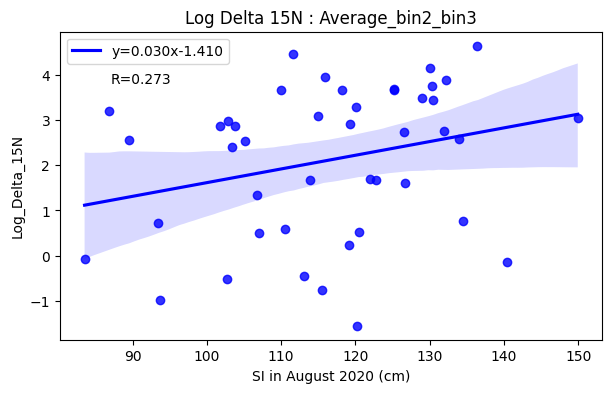

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(RL_table_main['SI'],RL_table_main['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="SI", y="Log_Delta_15N", data=RL_table_main, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='SI in August 2020 (cm)', ylabel="Log_Delta_15N")
plt.text(87, 3.8, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.title('Log Delta 15N : Average_bin2_bin3')
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

0.7608205122354867 1.6938344283854496 0.18962218958008842 0.21764188174500482


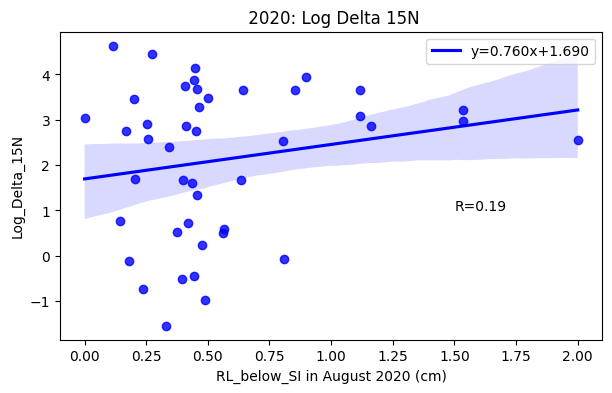

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(RL_table_main['RL_below_SI'],RL_table_main['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="RL_below_SI", y="Log_Delta_15N", data=RL_table_main, color='b',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='RL_below_SI in August 2020 (cm)', ylabel="Log_Delta_15N")
plt.text(1.5, 1 ,"R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
plt.title(' 2020: Log Delta 15N')
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

/tmp/ipykernel_5146/3845289956.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(RL_table_main.corr(), dtype=np.bool))


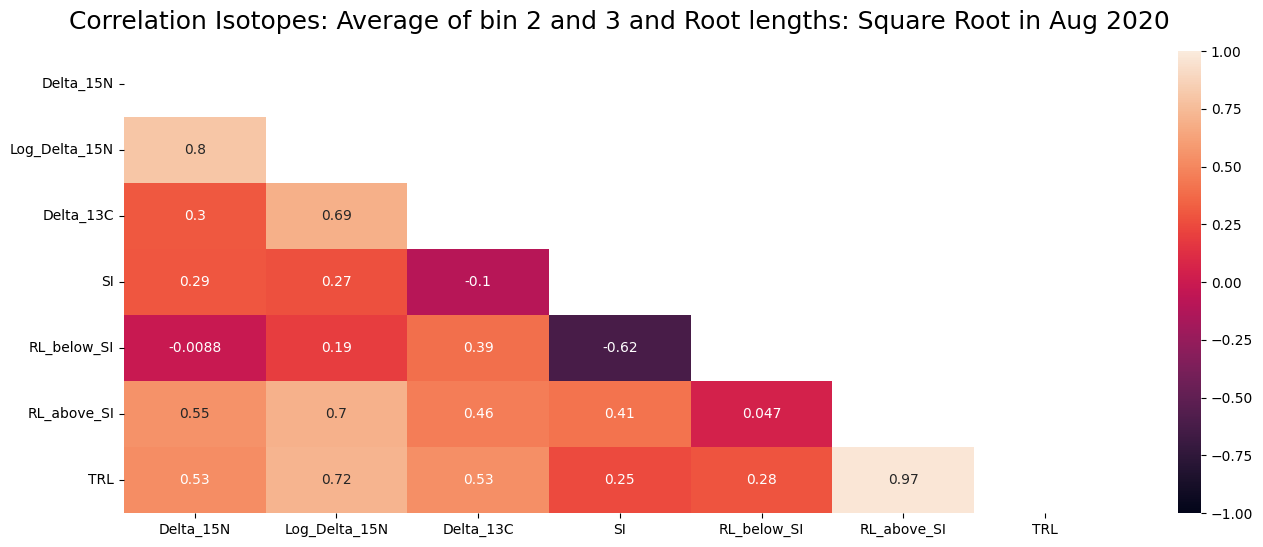

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(RL_table_main.corr(), dtype=np.bool))
heatmap = sns.heatmap(RL_table_main.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Isotopes: Average of bin 2 and 3 and Root lengths: Square Root in Aug 2020', fontdict={'fontsize':18}, pad=16);